In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
sns.set()

In [3]:
dta = sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X = X.rename(columns =
             {'C(occupation)[T.2.0]':'occ_2',
              'C(occupation)[T.3.0]':'occ_3',
              'C(occupation)[T.4.0]':'occ_4',
              'C(occupation)[T.5.0]':'occ_5',
              'C(occupation)[T.6.0]':'occ_6',
              'C(occupation_husb)[T.2.0]':'occ_husb_2',
              'C(occupation_husb)[T.3.0]':'occ_husb_3',
              'C(occupation_husb)[T.4.0]':'occ_husb_4',
              'C(occupation_husb)[T.5.0]':'occ_husb_5',
              'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [4]:
X.head(10)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [5]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [6]:
X.shape

(6366, 17)

In [7]:
pd.Series(y).value_counts()

0.0    4313
1.0    2053
dtype: int64

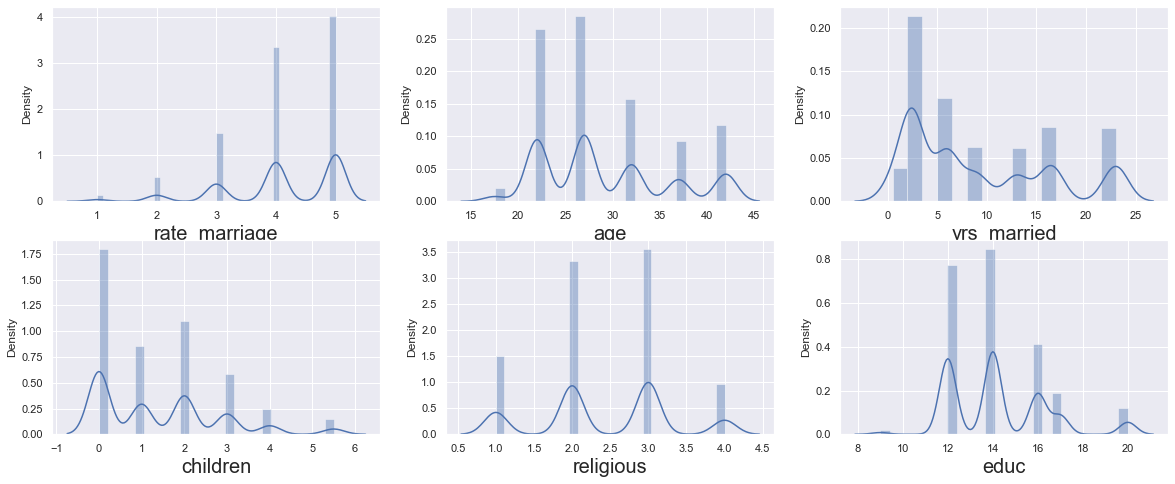

In [8]:
import seaborn as sns
sns.set()
plt.figure(figsize=(20,25), facecolor='white')
pltnum = 1

for col in X.iloc[:,11:]:
    if pltnum<=17 :
        ax = plt.subplot(6,3,pltnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    pltnum+=1
plt.show()

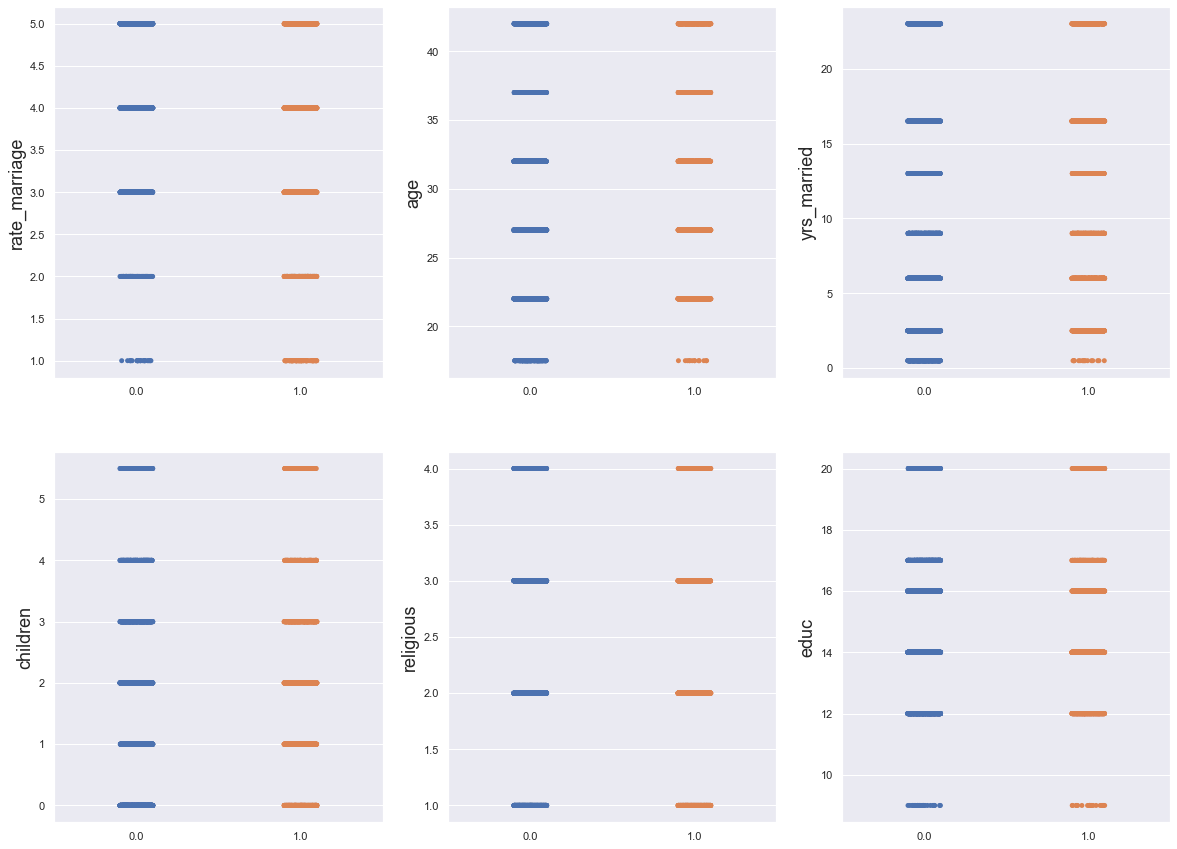

In [9]:
plt.figure(figsize=(20,15), facecolor='white')
pltnum = 1
for col in X.iloc[:,11:]:
    if pltnum<=7:
        ax = plt.subplot(2,3,pltnum)
        sns.stripplot(y, X[col])
        plt.ylabel(col,fontsize = 18)
    pltnum+=1
plt.show()

<AxesSubplot:>

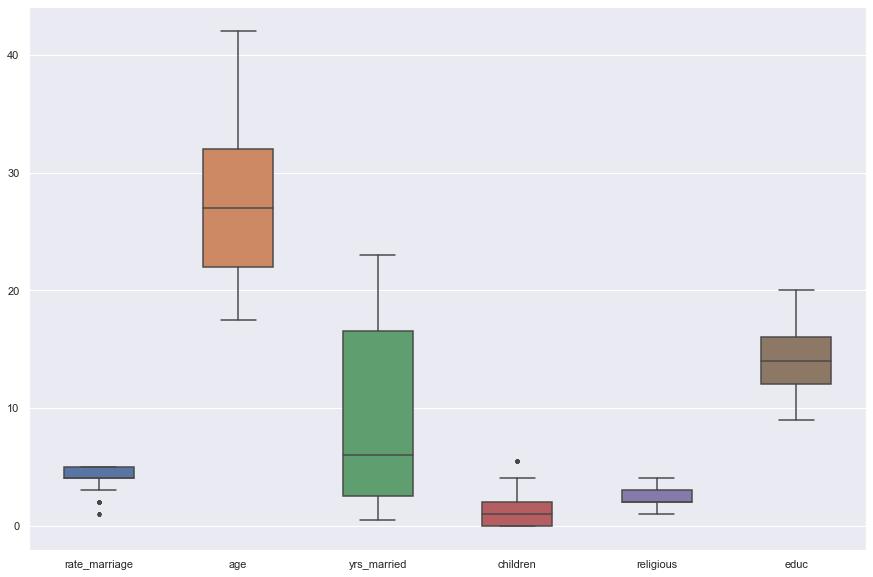

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X.iloc[:,11:], width= 0.5,ax=ax,  fliersize=3)

In [11]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_scaled = sc1.fit_transform(X.iloc[:,11:])

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = X.iloc[:,11:].columns

In [13]:
vif

,vif,Features
0,1.033282,rate_marriage
1,5.427811,age
2,7.140113,yrs_married
3,2.524519,children
4,1.035797,religious
5,1.111994,educ


#### Years married has very high varicance inflation factor so we are going to drop it.

In [14]:
X = X.drop('yrs_married',axis = 1)

In [15]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,1.0,1.0,14.0


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X.iloc[:,11:])

In [17]:
X_scaled = X.drop(['rate_marriage','age','children','religious','educ'],axis = 1)

In [18]:
X_scaled = pd.concat([X_scaled,pd.DataFrame(x_scaled)],axis = 1)

In [19]:
X_scaled.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,yrs_married,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.5,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.5,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 616)

In [21]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred = LogReg.predict(x_test)

In [23]:
confusion_matrix(y_test,y_pred)

array([[758,  83],
       [286, 147]], dtype=int64)

In [24]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

In [25]:
auc = roc_auc_score(y_test,y_pred)

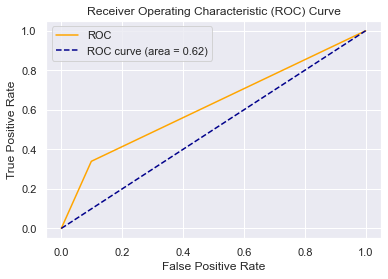

In [26]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [27]:
accuracy_score(y_test,y_pred)

0.7103610675039247

In [28]:
import pickle
with open('CheatLogR.pkl','wb') as f:
    pickle.dump(LogReg,f)
with open('CheatScaler.pkl','wb') as f:
    pickle.dump(sc,f)